In [1]:
import sys
sys.path.append('/Users/ntarshish/Documents/floater/')
from floater import generators
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np 

In [2]:
def plot_hex(mask, mask_grid_x, mask_grid_y):
    mask_bool = mask.astype('bool') # convert from int array to bool array 
    mask_bool_flat = mask_bool.ravel()
    mask_geo = np.dstack(np.meshgrid(mask_lon, mask_lat)).reshape(-1, 2) #fast cartesian product
    land_indices = np.nonzero(np.invert(mask_bool_flat).astype('int')) #indices of land points
    land_geo = mask_geo[land_indices] #geodetic locations of land points 
    land_x, land_y = np.transpose(land_geo)
    
    # hexagonal tiling of floats 
    float_x, float_y = np.transpose(fs.get_hexcoords(mask=mask_bool, mask_grid_x=mask_lon, mask_grid_y=mask_lat))

    # plot the result 
    plt.figure(figsize=(15,15))
    plt.scatter(float_x,float_y, color='blue', label='Floats')
    plt.scatter(land_x, land_y, color='lime', label='Land')
    plt.legend()
    plt.show()

In [3]:
# an example domain and float set
fs = generators.FloatSet((140,150), (45,55), dx=0.1, dy=0.1)
mask_lat = np.linspace(45,55,20) # 1D array of 20 evenly spaced latitudes  
mask_lon = np.linspace(140,150,20) # 1D array of 20 evenly spaced longitudes

# Sample Mask 1

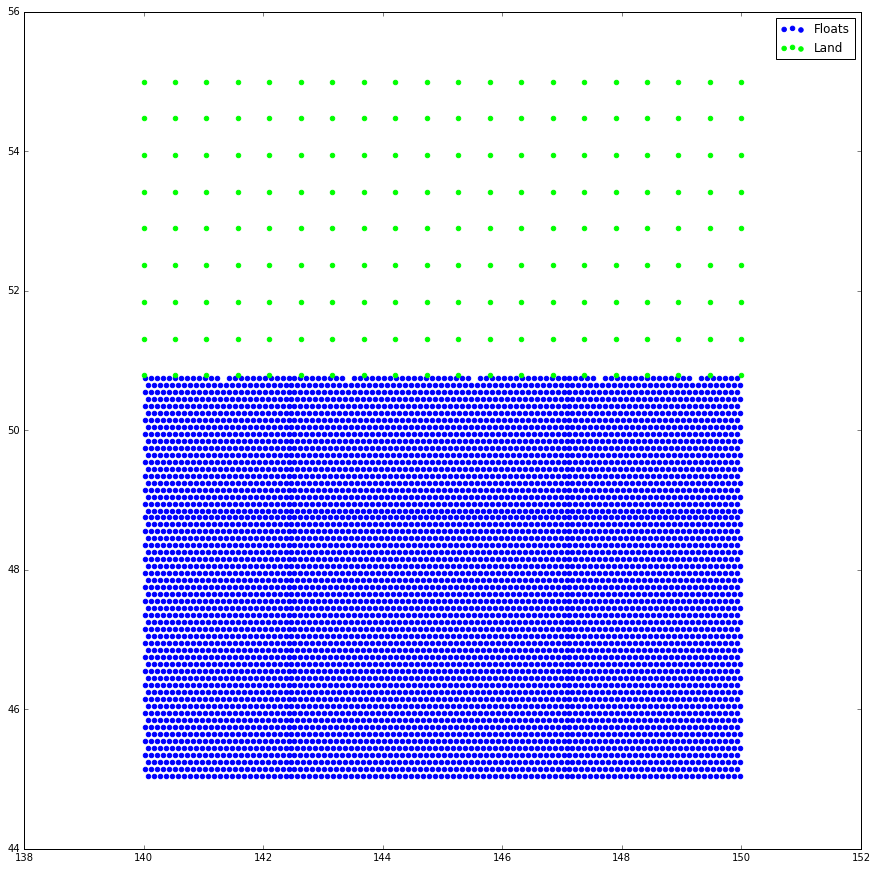

In [4]:
mask = np.ones((np.shape(mask_lon)[0],np.shape(mask_lat)[0]))
for i in range(np.shape(mask)[0]):
    for j in range(np.shape(mask)[1]):
        if i > 10:
            mask[i,j] = 0
plot_hex(mask, mask_grid_x=mask_lon, mask_grid_y=mask_lat)

# Sample Mask 2

In [5]:
mask = np.ones((np.shape(mask_lon)[0],np.shape(mask_lat)[0]))
for i in range(np.shape(mask)[0]):
    for j in range(np.shape(mask)[1]):
        if (i-5)^2 + (j-5)^2 < 5:
            mask[i,j] = 0

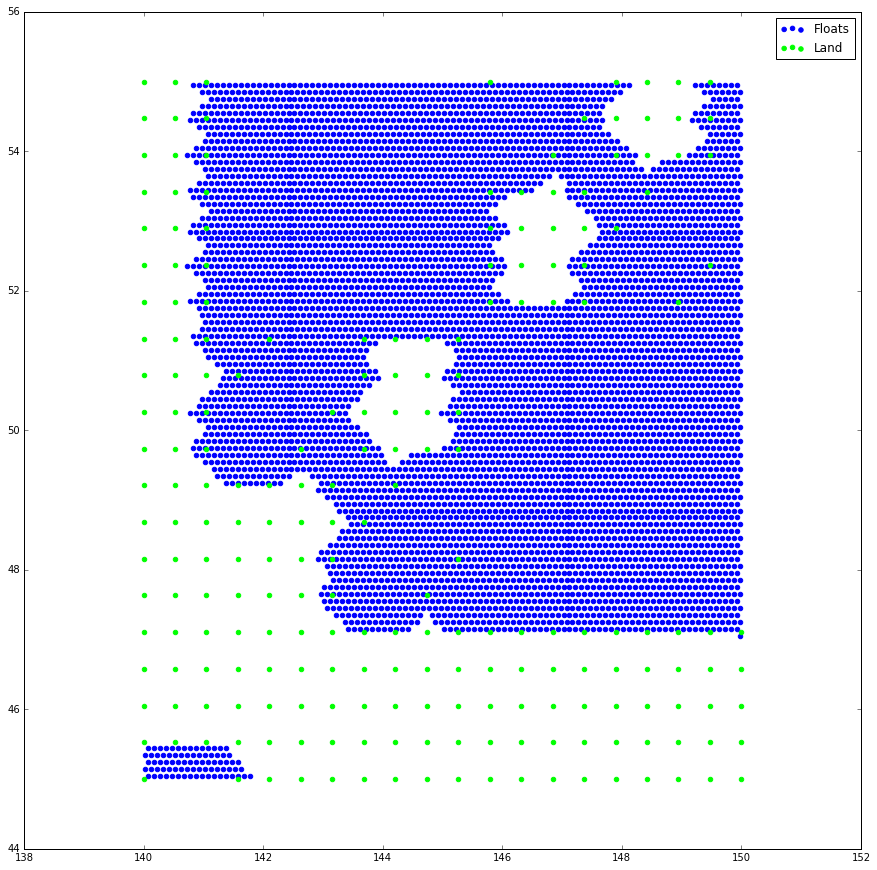

In [6]:
plot_hex(mask, mask_grid_x=mask_lon, mask_grid_y=mask_lat)

# Sample Mask 3

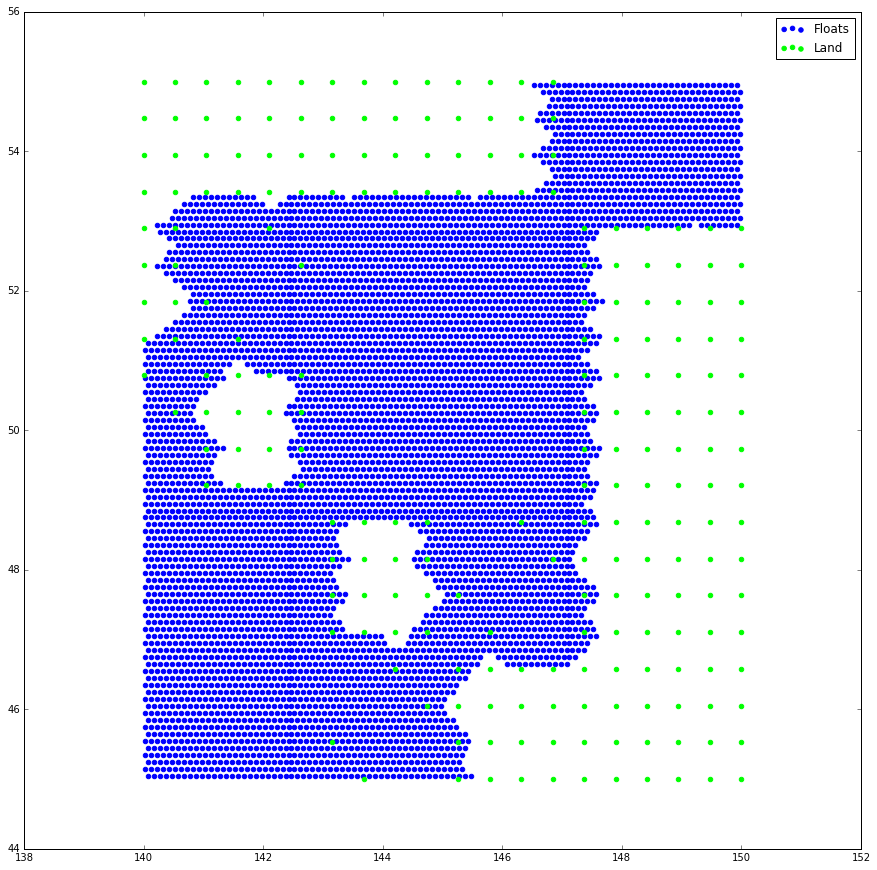

In [7]:
mask = np.ones((np.shape(mask_lon)[0],np.shape(mask_lat)[0]))
for i in range(np.shape(mask)[0]):
    for j in range(np.shape(mask)[1]):
        if i^2 + j^2 > 10:
            mask[i,j] = 0
plot_hex(mask, mask_grid_x=mask_lon, mask_grid_y=mask_lat)